### ML : Decision Tree, LGBM, KNN

* decision tree

In [1]:
import numpy as np
import pandas as pd

In [2]:
dt_preds = np.load('/workspace/ML_result/dt_preds.npy', allow_pickle=True)

In [3]:
y_test = np.load('/workspace/ML_result/y_test.npy', allow_pickle=True)

In [4]:
dt_score = np.load('/workspace/ML_result/dt_score.npy', allow_pickle=True)

In [5]:
y_test_ohe = []
for i in y_test:
    if i == 'Norm':
        y_test_ohe.append([0, 1, 0])
    elif i == 'UpNorm':
        y_test_ohe.append([1, 0, 0])
    else:
        y_test_ohe.append([0, 0, 1])

In [6]:
dt_preds_ohe = []
for i in dt_preds:
    if i == 'Norm':
        dt_preds_ohe.append([0, 1, 0])
    elif i == 'UpNorm':
        dt_preds_ohe.append([1, 0, 0])
    else:
        dt_preds_ohe.append([0, 0, 1])

* Sensitivity, PPV, Accuracy, F1 Score, Roc_Auc_Score, Auc Curve

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [8]:
def get_counts(seq): 
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [9]:
df_confusion_margin = pd.crosstab(y_test, dt_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('class weights:', get_counts(y_test))
print(df_confusion_margin)
print('accuracy_score:', accuracy_score(y_test, dt_preds))
print('balanced_accuracy_score:', balanced_accuracy_score(y_test, dt_preds))
print('recall_score:', recall_score(y_test, dt_preds, average='macro'))
print('PPV(precision_score):', precision_score(y_test, dt_preds, average='macro'))
print('f1_score:', f1_score(y_test, dt_preds, average='macro'))

class weights: {'Norm': 667, 'UpNorm': 23, 'DnNorm': 18}
Predicted  Norm  All
Actual              
DnNorm       18   18
Norm        667  667
UpNorm       23   23
All         708  708
accuracy_score: 0.942090395480226
balanced_accuracy_score: 0.3333333333333333
recall_score: 0.3333333333333333
PPV(precision_score): 0.314030131826742
f1_score: 0.3233939393939394


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
y_test_ohe = np.array(y_test_ohe)
dt_preds_ohe = np.array(dt_preds_ohe)

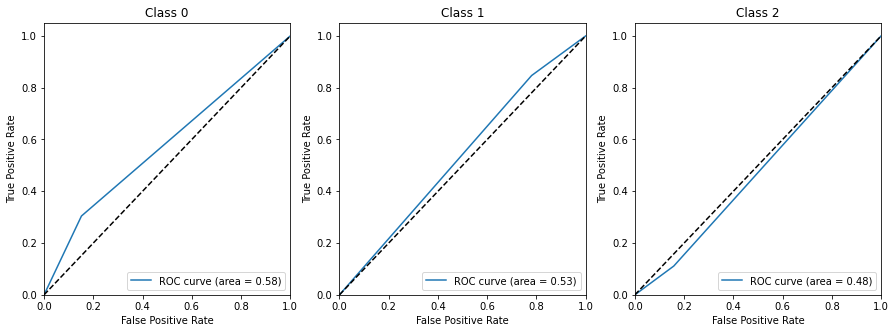

roc_auc_score:  0.5


In [11]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

n_classes = 3
# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], dt_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_ohe, dt_preds_ohe, multi_class='raise'))

* LGBM

In [12]:
lgbm_preds = np.load('/workspace/ML_result/lgbm_preds.npy', allow_pickle=True)

In [13]:
lgbm_preds_ohe = []
for i in lgbm_preds:
    if i == 'Norm':
        lgbm_preds_ohe.append([0, 1, 0])
    elif i == 'UpNorm':
        lgbm_preds_ohe.append([1, 0, 0])
    else:
        lgbm_preds_ohe.append([0, 0, 1])

In [14]:
lgbm_preds = np.array(lgbm_preds)

In [15]:
lgbm_score = np.load('/workspace/ML_result/lgbm_score.npy', allow_pickle=True)

In [16]:
df_confusion_margin = pd.crosstab(y_test, lgbm_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('class weights:', get_counts(y_test))
print(df_confusion_margin)
print('accuracy_score:', accuracy_score(y_test, lgbm_preds))
print('balanced_accuracy_score:', balanced_accuracy_score(y_test, lgbm_preds))
print('recall_score:', recall_score(y_test, lgbm_preds, average='macro'))
print('PPV(precision_score):', precision_score(y_test, lgbm_preds, average='macro'))
print('f1_score:', f1_score(y_test, lgbm_preds, average='macro'))

class weights: {'Norm': 667, 'UpNorm': 23, 'DnNorm': 18}
Predicted  DnNorm  Norm  UpNorm  All
Actual                              
DnNorm          0    18       0   18
Norm            2   656       9  667
UpNorm          0    23       0   23
All             2   697       9  708
accuracy_score: 0.9265536723163842
balanced_accuracy_score: 0.3278360819590205
recall_score: 0.3278360819590205
PPV(precision_score): 0.3137254901960784
f1_score: 0.3206256109481916


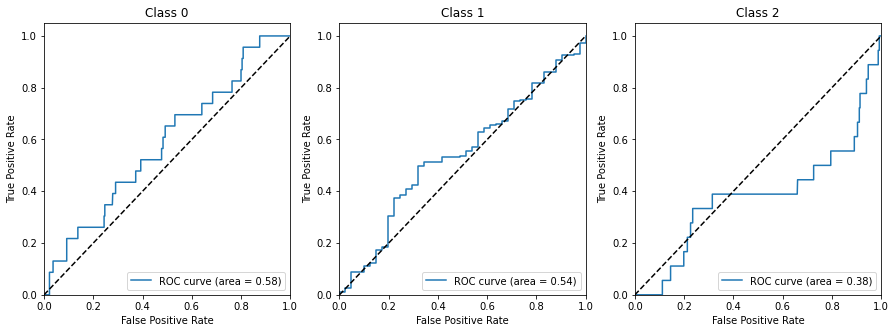

roc_auc_score:  0.4945785015035062


In [17]:
n_classes = 3
# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], lgbm_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_ohe, lgbm_preds_ohe, multi_class='raise'))

* KNN

In [19]:
knn_preds = np.load('/workspace/ML_result/neigh_preds.npy', allow_pickle=True)

In [20]:
knn_score = np.load('/workspace/ML_result/neigh_score.npy', allow_pickle=True)

In [21]:
knn_preds_ohe = []
for i in knn_preds:
    if i == 'Norm':
        knn_preds_ohe.append([0, 1, 0])
    elif i == 'UpNorm':
        knn_preds_ohe.append([1, 0, 0])
    else:
        knn_preds_ohe.append([0, 0, 1])

In [22]:
knn_preds_ohe = np.array(knn_preds_ohe)

In [23]:
df_confusion_margin = pd.crosstab(y_test, knn_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('class weights:', get_counts(y_test))
print(df_confusion_margin)
print('accuracy_score:', accuracy_score(y_test, knn_preds))
print('balanced_accuracy_score:', balanced_accuracy_score(y_test, knn_preds))
print('recall_score:', recall_score(y_test, knn_preds, average='macro'))
print('PPV(precision_score):', precision_score(y_test, knn_preds, average='macro'))
print('f1_score:', f1_score(y_test, knn_preds, average='macro'))

class weights: {'Norm': 667, 'UpNorm': 23, 'DnNorm': 18}
Predicted  Norm  All
Actual              
DnNorm       18   18
Norm        667  667
UpNorm       23   23
All         708  708
accuracy_score: 0.942090395480226
balanced_accuracy_score: 0.3333333333333333
recall_score: 0.3333333333333333
PPV(precision_score): 0.314030131826742
f1_score: 0.3233939393939394


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


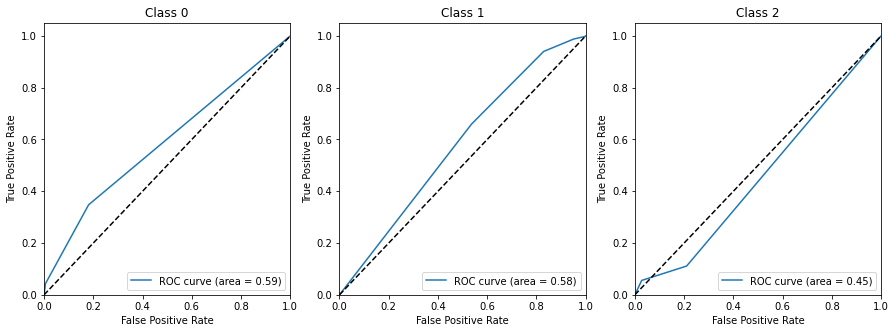

roc_auc_score:  0.5


In [24]:
n_classes = 3
# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], knn_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_ohe, knn_preds_ohe, multi_class='raise'))